In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_Canada'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html')
df = soup.find_all('table')[1]
#<table class="wikitable sortable jquery-tablesorter" style="text-align:right;">
#soup.find_all('table') will find all tables in the soup bwe can decide which table we want by using indexing of table # on webpage, table 1 index 0 [0] remeber
#soup.find_all('table')[1]

/var/folders/vz/97lmmtfj25lb974955c_kvv40000gn/T/ipykernel_35143/627460440.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(df)

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th align="center">Rank
</th>
<th align="center">Forbes <br/>2000 rank
</th>
<th align="center">Name
</th>
<th align="center">Headquarters
</th>
<th align="center">Revenue<br/>(billions <br/>US$)
</th>
<th align="center">Profit<br/>(billions <br/>US$)
</th>
<th align="center">Assets<br/>(billions <br/>US$)
</th>
<th align="center">Value<br/>(billions <br/>US$)
</th>
<th align="center">Industry
</th></tr>
<tr>
<td>1
</td>
<td>41
</td>
<td align="left"><a href="/wiki/Royal_Bank_of_Canada" title="Royal Bank of Canada">Royal Bank of Canada</a>
</td>
<td align="left">Toronto
</td>
<td>46.3
</td>
<td>9.6
</td>
<td>1,040.3
</td>
<td>114.9
</td>
<td align="left">Banking
</td></tr>
<tr>
<td>2
</td>
<td>46
</td>
<td align="left"><a href="/wiki/Toronto-Dominion_Bank" title="Toronto-Dominion Bank">Toronto-Dominion Bank</a>
</td>
<td align="left">Toronto
</td>
<td>42.5
</td>
<td>8.7
</td>
<td>1,007.0
</td>
<td>103.8
</td>
<td 

In [3]:
titlesd = df.find_all('th')

In [4]:
titlef = [title.text.strip() for title in titlesd]
print(titlef)


['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters', 'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)', 'Value(billions US$)', 'Industry']


In [5]:
dataframe = pd.DataFrame(columns = titlef)
dataframe

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry


In [6]:
col_data = df.find_all('tr')

In [7]:
for row in col_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    length = len(dataframe)
    dataframe.loc[length] = individual_row_data

In [8]:
dataframe

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,41,Royal Bank of Canada,Toronto,46.3,9.6,"1,040.3",114.9,Banking
1,2,46,Toronto-Dominion Bank,Toronto,42.5,8.7,"1,007.0",103.8,Banking
2,3,87,Scotiabank,Toronto,32.4,6.4,787.5,67.1,Banking
3,4,118,Brookfield Asset Management,Toronto,57.6,3.6,256.3,46.0,Finance
4,5,134,Bank of Montreal,Montreal,26.2,4.6,614.2,50.4,Banking
5,6,166,Manulife,Toronto,28.4,3.7,517.8,36.2,Insurance
6,7,174,Enbridge,Calgary,36.1,2.2,122.2,75.3,Oil and Gas
7,8,190,Canadian Imperial Bank of Commerce,Toronto,20.2,3.9,486.0,36.8,Banking
8,9,229,Suncor Energy,Calgary,29.7,2.5,65.6,52.6,Oil and Gas
9,10,273,Sun Life Financial,Toronto,23.4,2.0,196.0,24.5,Insurance


In [9]:
dataframe.to_csv(r'/Users/adityakapur/Desktop/python/ex2.3/data.csv',index=False)

In [10]:
dataframe.head()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
0,1,41,Royal Bank of Canada,Toronto,46.3,9.6,"1,040.3",114.9,Banking
1,2,46,Toronto-Dominion Bank,Toronto,42.5,8.7,"1,007.0",103.8,Banking
2,3,87,Scotiabank,Toronto,32.4,6.4,787.5,67.1,Banking
3,4,118,Brookfield Asset Management,Toronto,57.6,3.6,256.3,46.0,Finance
4,5,134,Bank of Montreal,Montreal,26.2,4.6,614.2,50.4,Banking


In [11]:
dataframe.describe()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
count,56,56,56,56,56,56,56,56,56
unique,56,56,56,14,51,34,55,54,22
top,1,41,Royal Bank of Canada,Toronto,5.5,0.5,17.0,9.4,Oil and Gas
freq,1,1,1,19,2,8,2,2,8


In [12]:
dataframe.tail()

,Rank,Forbes 2000 rank,Name,Headquarters,Revenue(billions US$),Profit(billions US$),Assets(billions US$),Value(billions US$),Industry
51,52,1757,Constellation Software,Toronto,3.1,0.4,2.9,18.7,IT services
52,53,1805,Canadian Utilities,Calgary,3.4,0.5,16.0,7.6,Utilities
53,54,1940,Laurentian Bank of Canada,Montreal,1.4,0.2,34.4,1.3,Banking
54,55,1975,Goldcorp,Vancouver,3.0,−4.2,17.0,9.4,Mining
55,56,1978,CAPREIT,Toronto,0.5,0.9,7.9,5.5,Real estate


In [13]:
dataframe.columns

Index(['Rank', 'Forbes 2000 rank', 'Name', 'Headquarters',
       'Revenue(billions US$)', 'Profit(billions US$)', 'Assets(billions US$)',
       'Value(billions US$)', 'Industry'],
      dtype='object')

In [14]:
dataframe.dtypes

Rank                     object
Forbes 2000 rank         object
Name                     object
Headquarters             object
Revenue(billions US$)    object
Profit(billions US$)     object
Assets(billions US$)     object
Value(billions US$)      object
Industry                 object
dtype: object

In [15]:
# Step 2: Data Preperation
. Dropping irrelevant columns and rows
. Identifying duplicated columns
. Renaming Columns
. Feature Creation

SyntaxError: invalid syntax (639869499.py, line 2)

In [ ]:
dataframe = dataframe[['Rank', 'Name', 'Headquarters','Profit(billions US$)',
       'Value(billions US$)', 'Industry']].copy()

In [ ]:
dataframe = dataframe.set_index('Rank')

In [ ]:
dataframe.loc['1']

In [22]:
dataframe.dtypes

Rank                      object
Forbes 2000 rank          object
Name                      object
Headquarters              object
Revenue(billions US$)     object
Profit(billions US$)     float64
Assets(billions US$)      object
Value(billions US$)      float64
Industry                  object
dtype: object

In [19]:
df_subset.dtypes

NameError: name 'df_subset' is not defined

In [21]:
dataframe['Value(billions US$)'] = pd.to_numeric(dataframe['Value(billions US$)'])
dataframe['Profit(billions US$)'] = pd.to_numeric(dataframe['Profit(billions US$)'].str.replace('−', '-'), errors='coerce')


AttributeError: Can only use .str accessor with string values!

In [23]:
df_subset = dataframe.loc[dataframe['Value(billions US$)'] > 10]

In [25]:
df_subset = df_subset[['Rank', 'Name', 'Headquarters','Profit(billions US$)',
       'Value(billions US$)', 'Industry']].copy()

In [26]:
df_subset.isna().sum()

Rank                    0
Name                    0
Headquarters            0
Profit(billions US$)    0
Value(billions US$)     0
Industry                0
dtype: int64

In [27]:
df_subset.loc[df_subset.duplicated()]

,Rank,Name,Headquarters,Profit(billions US$),Value(billions US$),Industry


In [28]:
df_subset.loc[df_subset.duplicated(subset=['Name'])]

,Rank,Name,Headquarters,Profit(billions US$),Value(billions US$),Industry


Text(0, 0.5, 'Count')

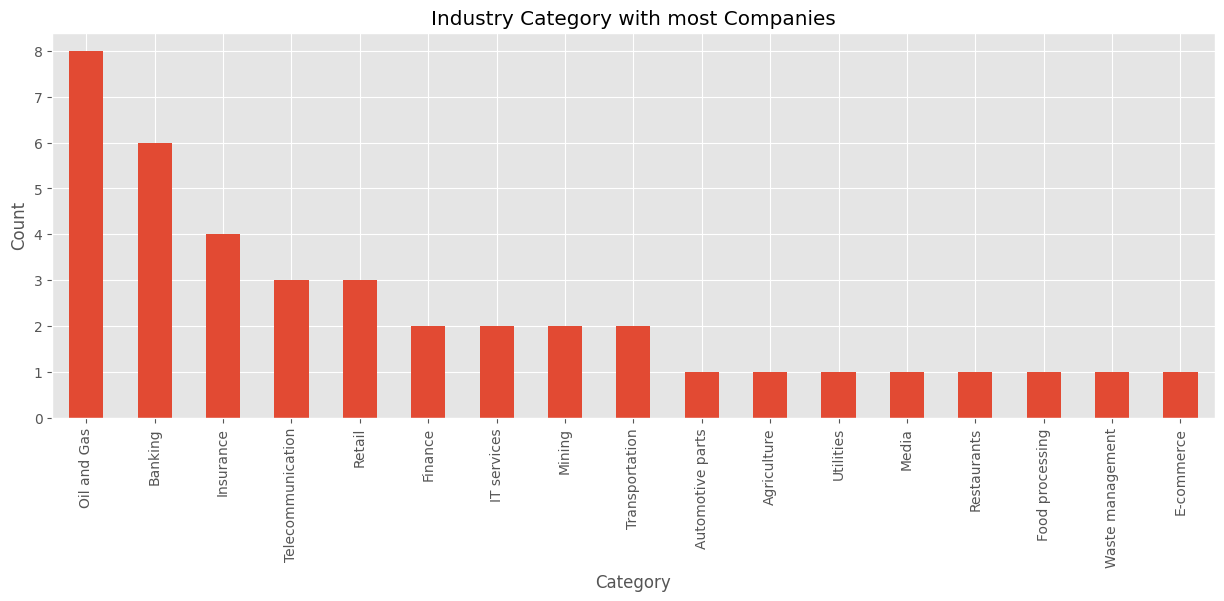

In [94]:
ax = df_subset["Industry"].value_counts().head(20).plot(kind ='bar',title = 'Industry Category with most Companies',figsize=(15,5))
ax.set_xlabel('Category')
ax.set_ylabel('Count')

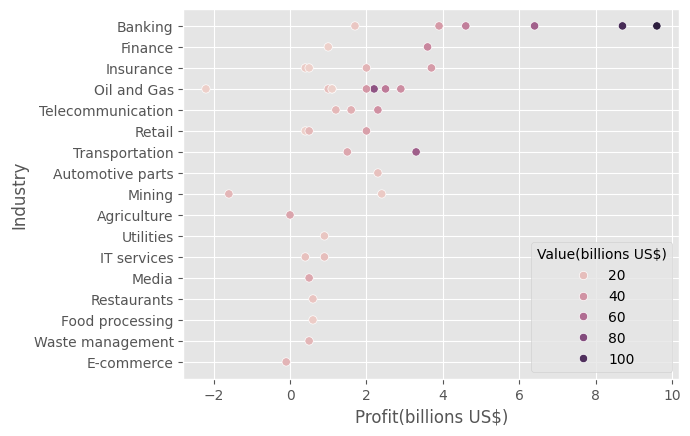

In [44]:
sns.scatterplot(x='Profit(billions US$)',y='Industry',data=df_subset,hue='Value(billions US$)')
plt.show()

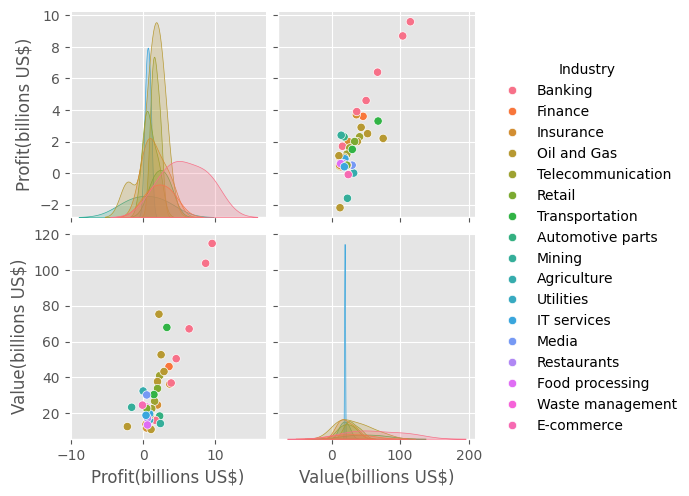

In [50]:
sns.pairplot(df_subset,vars=['Profit(billions US$)','Value(billions US$)'],hue='Industry')
plt.show()

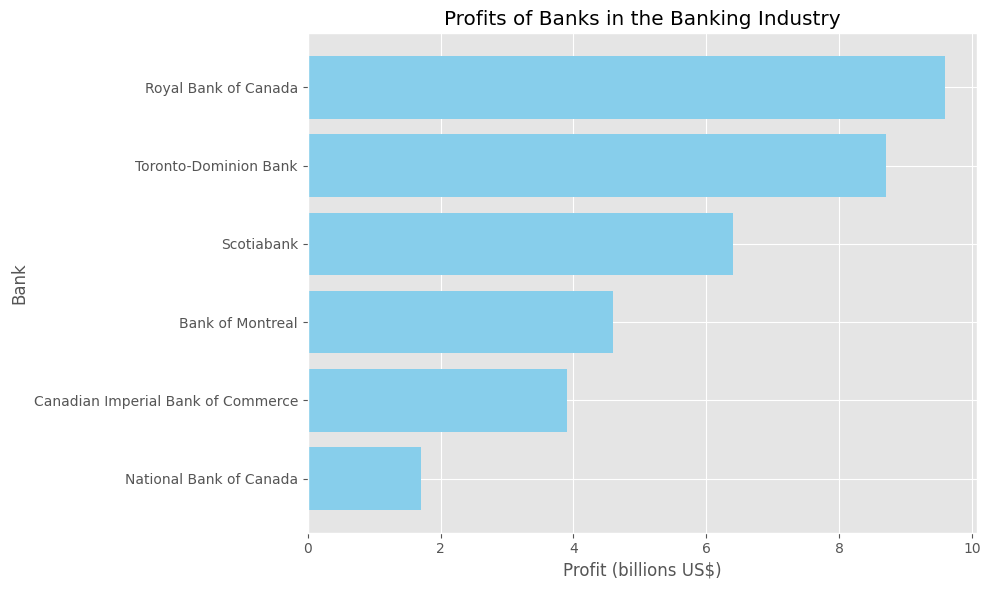

In [54]:
# Filter rows where Industry is Banking
banking_df = df_subset[df_subset['Industry'] == 'Banking']

# Create a new DataFrame with only Name and Profit(billions US$) columns
banking_profit_df = banking_df[['Name', 'Profit(billions US$)']]

# Sort the banking_profit_df by profit in descending order
banking_profit_df_sorted = banking_profit_df.sort_values(by='Profit(billions US$)', ascending=False)

# Reset the index of the sorted DataFrame
banking_profit_df_sorted.reset_index(drop=True, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(banking_profit_df_sorted['Name'], banking_profit_df_sorted['Profit(billions US$)'], color='skyblue')
plt.xlabel('Profit (billions US$)')
plt.ylabel('Bank')
plt.title('Profits of Banks in the Banking Industry')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest profit at the top
plt.tight_layout()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vz/97lmmtfj25lb974955c_kvv40000gn/T/ipykernel_35143/2218130074.py:2: SyntaxWarning: invalid escape sequence '\$'
  dataframe['Revenue(billions US$)'] = dataframe['Revenue(billions US$)'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vz/97lmmtfj25lb974955c_kvv40000gn/T/ipykernel_35143/2218130074.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_industry_sorted, y='Industry', x='Revenue(billions US$)', palette='viridis')


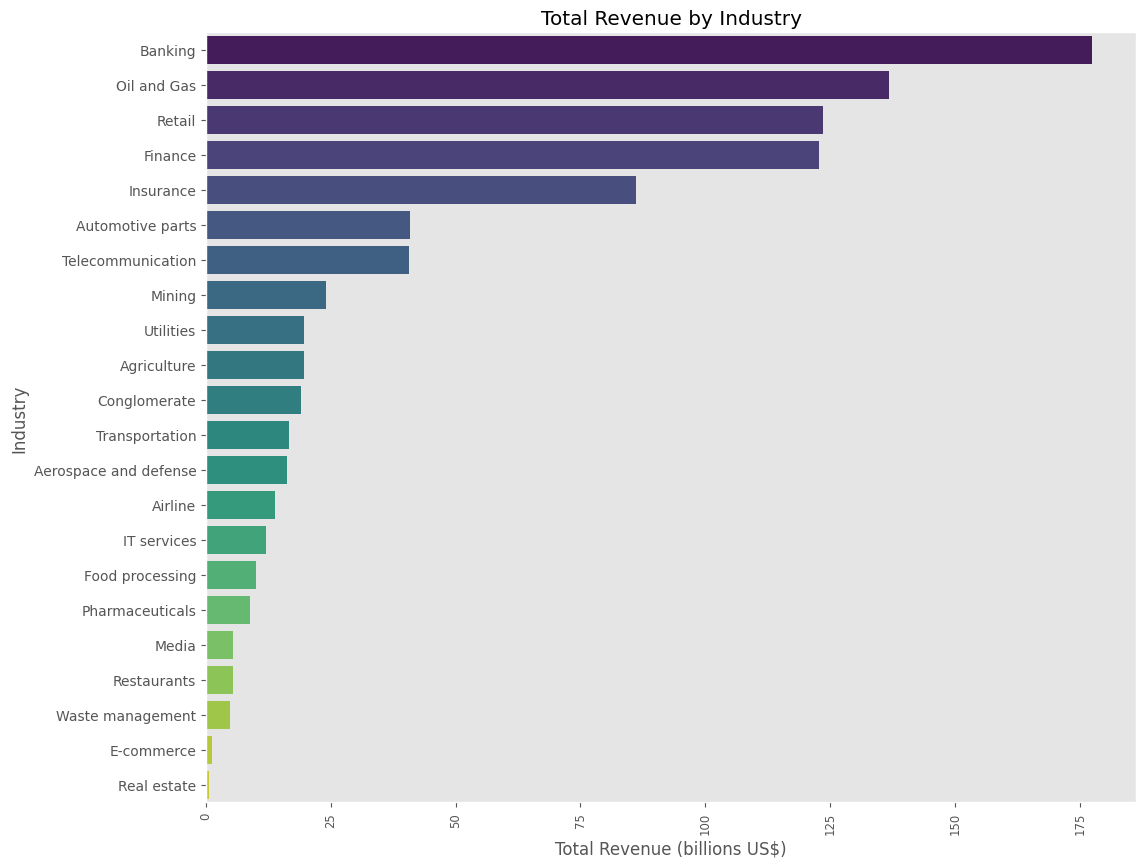

In [106]:
# Convert 'Revenue(billions US$)' column to numeric values
dataframe['Revenue(billions US$)'] = dataframe['Revenue(billions US$)'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by Industry and sum the revenue for each industry
revenue_by_industry = dataframe.groupby('Industry')['Revenue(billions US$)'].sum().reset_index()

# Sort the data in descending order based on total revenue
revenue_by_industry_sorted = revenue_by_industry.sort_values(by='Revenue(billions US$)', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 10))
sns.barplot(data=revenue_by_industry_sorted, y='Industry', x='Revenue(billions US$)', palette='viridis')
plt.xlabel('Total Revenue (billions US$)')
plt.ylabel('Industry')
plt.title('Total Revenue by Industry')
plt.xticks(rotation=90, fontsize='small')
plt.grid(axis='x')  # Add grid lines along the x-axis for better readability

# Format x-axis ticks with commas and no decimal places
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()
